 # <center> <b>  TOTAL CLAIM AMOUNT </b> </center> 

* * * * *
The aim is to Build a predictive model that can provide the total amount of claim by a customer



In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score
import warnings
warnings.simplefilter(action='ignore')
#from google.colab import files

In [23]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,Customer_ID,months_as_customer,age,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,...,authorities_contacted,incident_state,incident_city,witnesses,police_report_available,auto_make,auto_model,auto_year,_c39,total_claim_amount
0,Customer_541,239,41,FEMALE,JD,farming-fishing,paintball,other-relative,51400,-6300,...,Police,NC,Arlington,2,YES,Mercedes,E400,2013,NaN,14386.67
1,Customer_440,108,31,MALE,Masters,protective-serv,yachting,not-in-family,0,0,...,Fire,NY,Columbus,2,NO,Dodge,Neon,2006,NaN,76440.00
2,Customer_482,116,30,MALE,JD,handlers-cleaners,golf,not-in-family,0,-35500,...,Other,WV,Riverwood,3,?,Volkswagen,Passat,2004,NaN,79560.00
3,Customer_422,8,21,MALE,High School,handlers-cleaners,hiking,husband,0,0,...,Other,WV,Columbus,0,?,Toyota,Corolla,2012,NaN,121680.00
4,Customer_778,161,38,MALE,PhD,priv-house-serv,exercise,not-in-family,60200,0,...,Police,WV,Springfield,2,YES,Volkswagen,Jetta,2003,NaN,80640.00


In [24]:
test.head()

,Customer_ID,months_as_customer,age,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,...,incident_severity,authorities_contacted,incident_state,incident_city,witnesses,police_report_available,auto_make,auto_model,auto_year,_c39
0,Customer_521,5,26,FEMALE,PhD,farming-fishing,skydiving,not-in-family,31500,0,...,Total Loss,Ambulance,WV,Springfield,3,?,Audi,A5,2003,NaN
1,Customer_737,160,33,FEMALE,High School,exec-managerial,exercise,husband,61600,0,...,Total Loss,Ambulance,NC,Riverwood,3,YES,Nissan,Pathfinder,2006,NaN
2,Customer_740,385,51,FEMALE,MD,craft-repair,reading,husband,0,-61000,...,Minor Damage,Other,WV,Riverwood,3,?,Suburu,Legacy,2007,NaN
3,Customer_660,446,57,MALE,College,adm-clerical,sleeping,unmarried,42700,-64900,...,Total Loss,Police,SC,Northbrook,0,NO,Jeep,Wrangler,2012,NaN
4,Customer_411,84,29,FEMALE,High School,machine-op-inspct,video-games,not-in-family,0,-29900,...,Trivial Damage,Police,SC,Arlington,0,YES,BMW,3 Series,2005,NaN


## Checking for Null values and Data Types

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer_ID                  700 non-null    object 
 1   months_as_customer           700 non-null    int64  
 2   age                          700 non-null    int64  
 3   insured_sex                  700 non-null    object 
 4   insured_education_level      700 non-null    object 
 5   insured_occupation           700 non-null    object 
 6   insured_hobbies              700 non-null    object 
 7   insured_relationship         700 non-null    object 
 8   capital-gains                700 non-null    int64  
 9   capital-loss                 700 non-null    int64  
 10  policy_number                700 non-null    int64  
 11  policy_bind_date             700 non-null    object 
 12  policy_state                 700 non-null    object 
 13  policy_csl          

## Checking for Data Statistics

In [27]:
train.describe(include ='all')

,Customer_ID,months_as_customer,age,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,...,authorities_contacted,incident_state,incident_city,witnesses,police_report_available,auto_make,auto_model,auto_year,_c39,total_claim_amount
count,700,700.000000,700.000000,700,700,700,700,700,700.000000,700.000000,...,700,700,700,700.000000,700,700,700,700.000000,0.0,700.000000
unique,700,NaN,NaN,2,7,14,20,6,NaN,NaN,...,5,7,7,NaN,3,14,39,NaN,NaN,NaN
top,Customer_923,NaN,NaN,FEMALE,JD,machine-op-inspct,camping,own-child,NaN,NaN,...,Police,NY,Springfield,NaN,NO,Saab,Wrangler,NaN,NaN,NaN
freq,1,NaN,NaN,367,117,72,45,127,NaN,NaN,...,203,197,118,NaN,250,55,33,NaN,NaN,NaN
mean,NaN,209.528571,39.417143,NaN,NaN,NaN,NaN,NaN,25777.571429,-27061.000000,...,NaN,NaN,NaN,1.442857,NaN,NaN,NaN,2004.984286,NaN,71900.933214
std,NaN,114.746174,9.170472,NaN,NaN,NaN,NaN,NaN,28239.300780,27874.242557,...,NaN,NaN,NaN,1.132631,NaN,NaN,NaN,6.013198,NaN,34915.974923
min,NaN,0.000000,19.000000,NaN,NaN,NaN,NaN,NaN,0.000000,-111100.000000,...,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,1995.000000,NaN,133.330000
25%,NaN,123.000000,32.000000,NaN,NaN,NaN,NaN,NaN,0.000000,-51825.000000,...,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,2000.000000,NaN,58933.330000
50%,NaN,209.000000,39.000000,NaN,NaN,NaN,NaN,NaN,5000.000000,-27450.000000,...,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,2005.000000,NaN,77733.330000
75%,NaN,283.000000,45.000000,NaN,NaN,NaN,NaN,NaN,52200.000000,0.000000,...,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,2010.000000,NaN,95503.332500


In [28]:
train.shape

(700, 37)

In [29]:
test.shape

(300, 36)

In [30]:
cat_feat = list(train.select_dtypes(exclude = np.number).columns)
num_feat = list(train.select_dtypes(exclude = object).columns)
#I can use list

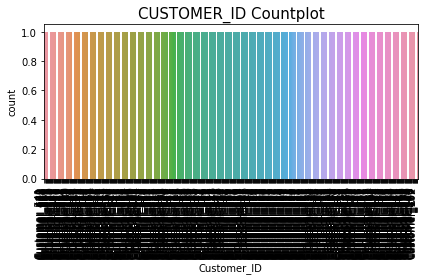

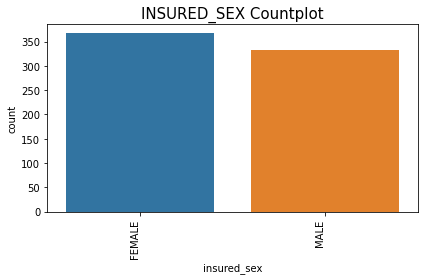

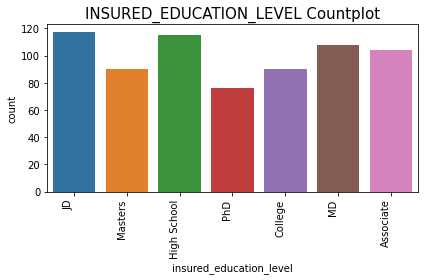

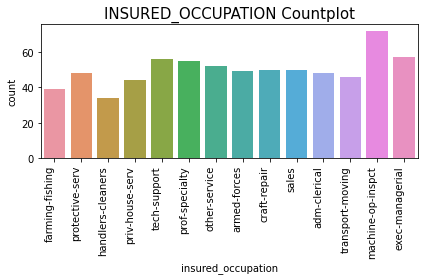

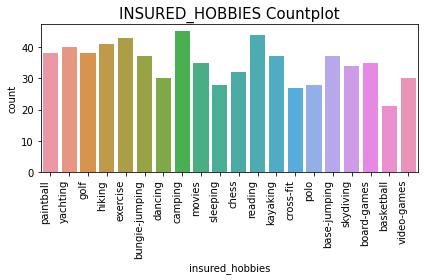

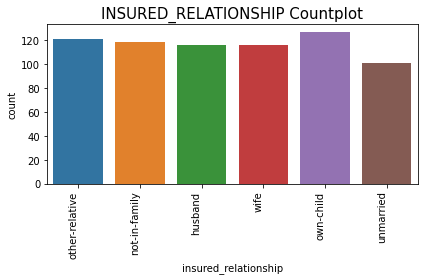

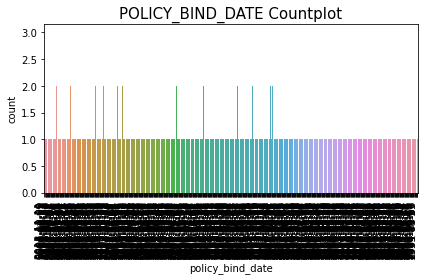

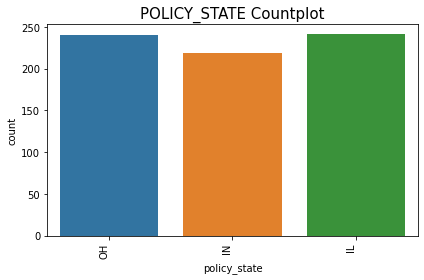

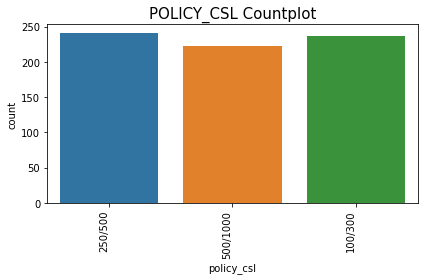

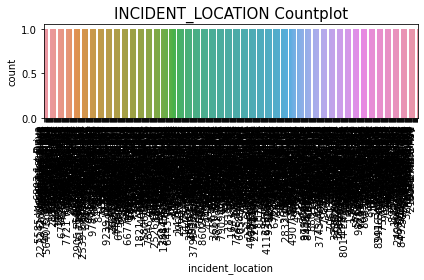

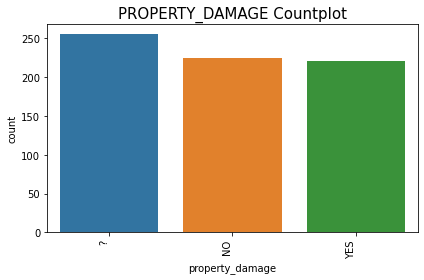

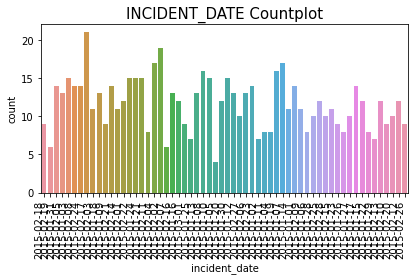

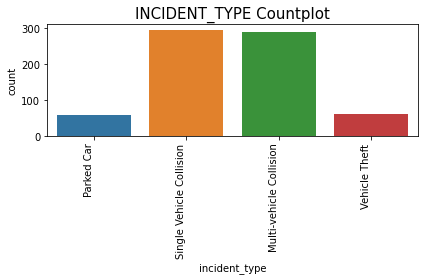

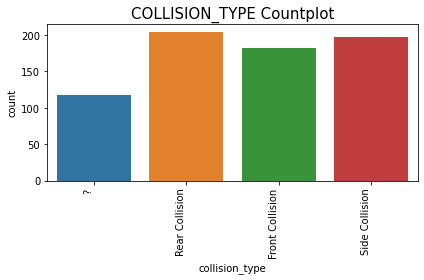

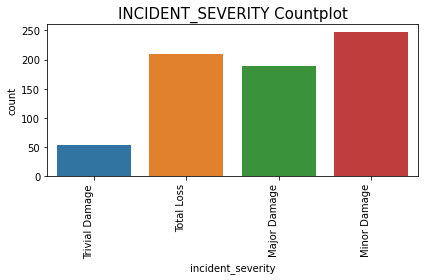

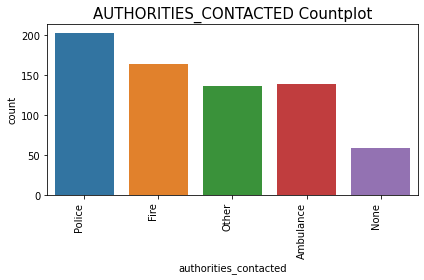

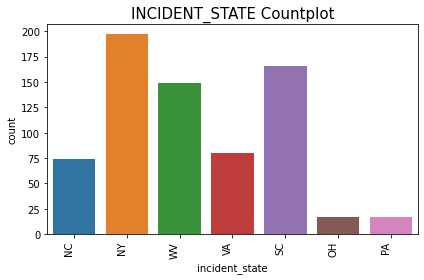

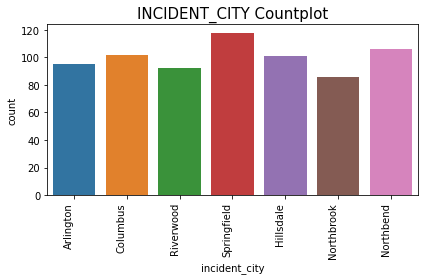

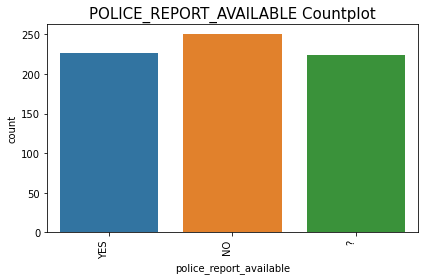

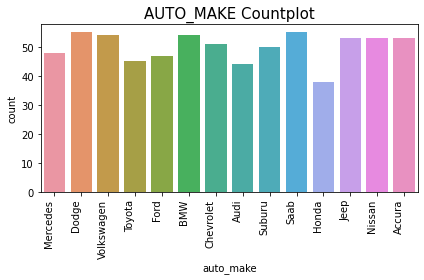

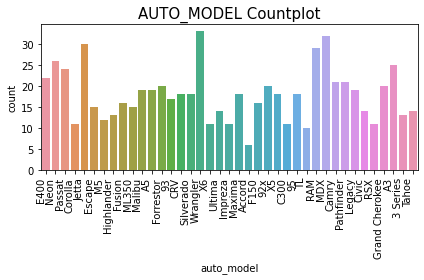

In [31]:
for col in cat_feat:
#     plt.figure(figsize=(12,5))
    g = sns.countplot(x=col, data=train)
    g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
    plt.title(col.upper()+' Countplot', size=15)
    plt.tight_layout()
    plt.show()

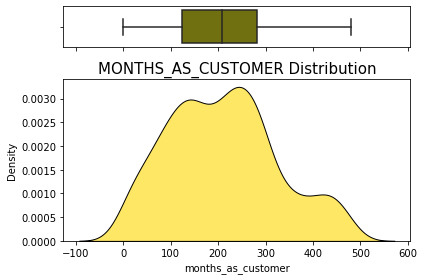

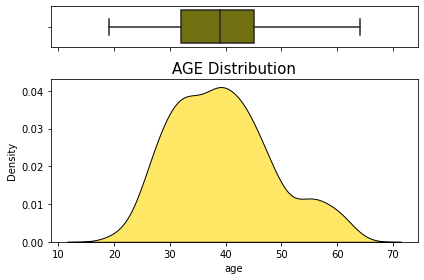

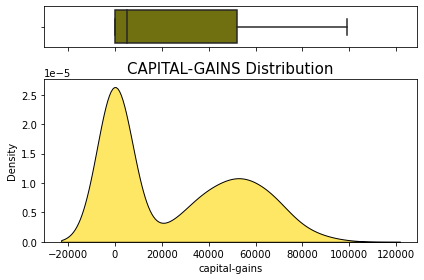

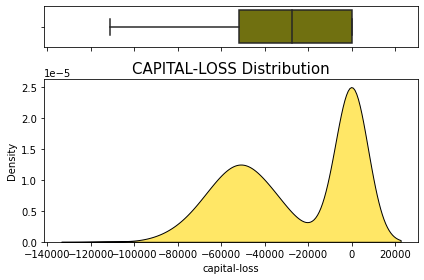

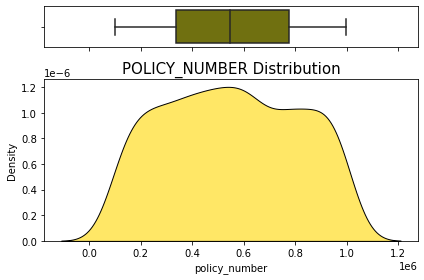

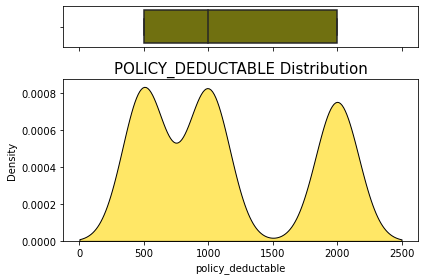

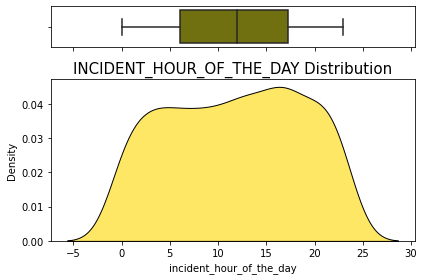

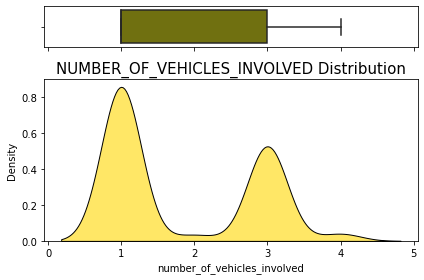

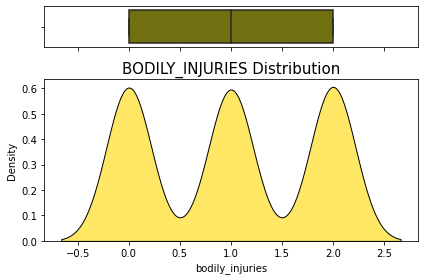

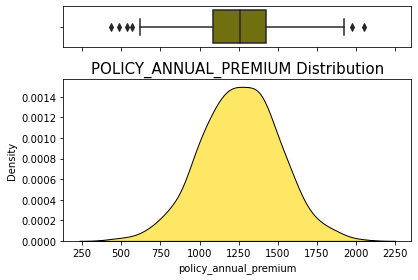

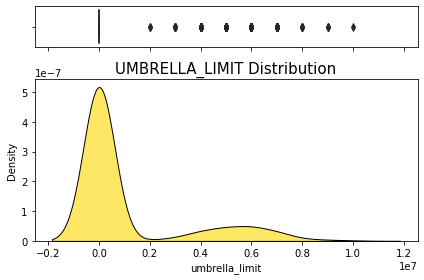

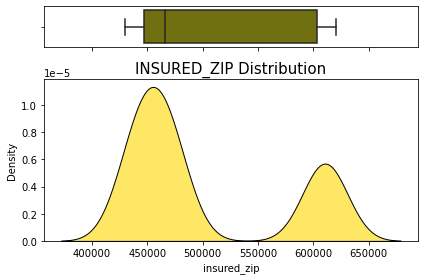

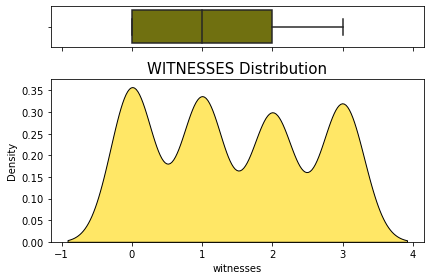

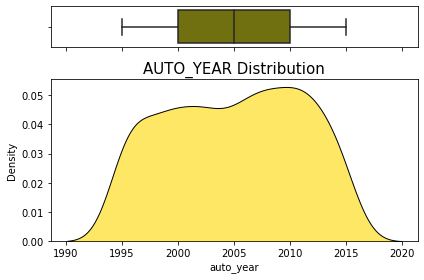

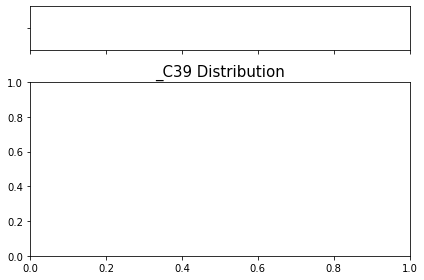

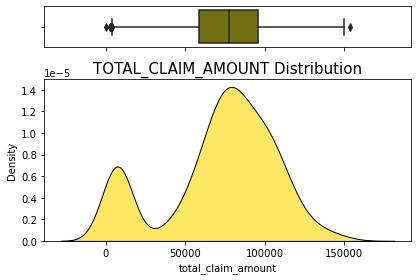

In [32]:
for col in train[num_feat]:
    ax = [None for i in range(2)]
    # set 2 subplots and set ratio of plots 
    f, (ax[0], ax[1]) = plt.subplots(2, sharex=True, 
                                        gridspec_kw={"height_ratios": (.20, .80)
                                        })   
    g1 = sns.boxplot(col, ax=ax[0], data=train, color='olive') # boxplot
    g1.set(xlabel=None) # remove x axis label for boxplot
    g2 = sns.kdeplot(train[col], ax=ax[1], shade=True, color='gold', alpha=0.6, 
                     zorder=3, edgecolor='black') # distribution plot
    plt.title(col.upper()+' Distribution', size=15)
    plt.tight_layout()
    plt.show()

In [33]:
train.columns

Index(['Customer_ID', 'months_as_customer', 'age', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'policy_number', 'policy_bind_date', 'policy_state', 'policy_csl',
       'policy_deductable', 'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city', 'witnesses',
       'police_report_available', 'auto_make', 'auto_model', 'auto_year',
       '_c39', 'total_claim_amount'],
      dtype='object')

In [34]:
date_check = train[['months_as_customer','incident_hour_of_the_day','incident_date','auto_year','policy_bind_date']]
date_check.head()

,months_as_customer,incident_hour_of_the_day,incident_date,auto_year,policy_bind_date
0,239,22,2015-02-18,2013,2013-11-11
1,108,14,2015-02-19,2006,2005-12-09
2,116,8,2015-01-31,2004,2001-11-29
3,8,21,2015-02-05,2012,2012-10-09
4,161,0,2015-01-03,2003,2004-01-02


In [35]:
train.isna().sum()
#to check the total null in each column

Customer_ID                      0
months_as_customer               0
age                              0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                  0
bodily_injuries                  0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
incident_date                    0
incident_type                    0
collision_type                   0
incident_severity                0
authorities_contacted            0
incident_state      

# DATA VISUALIZATION

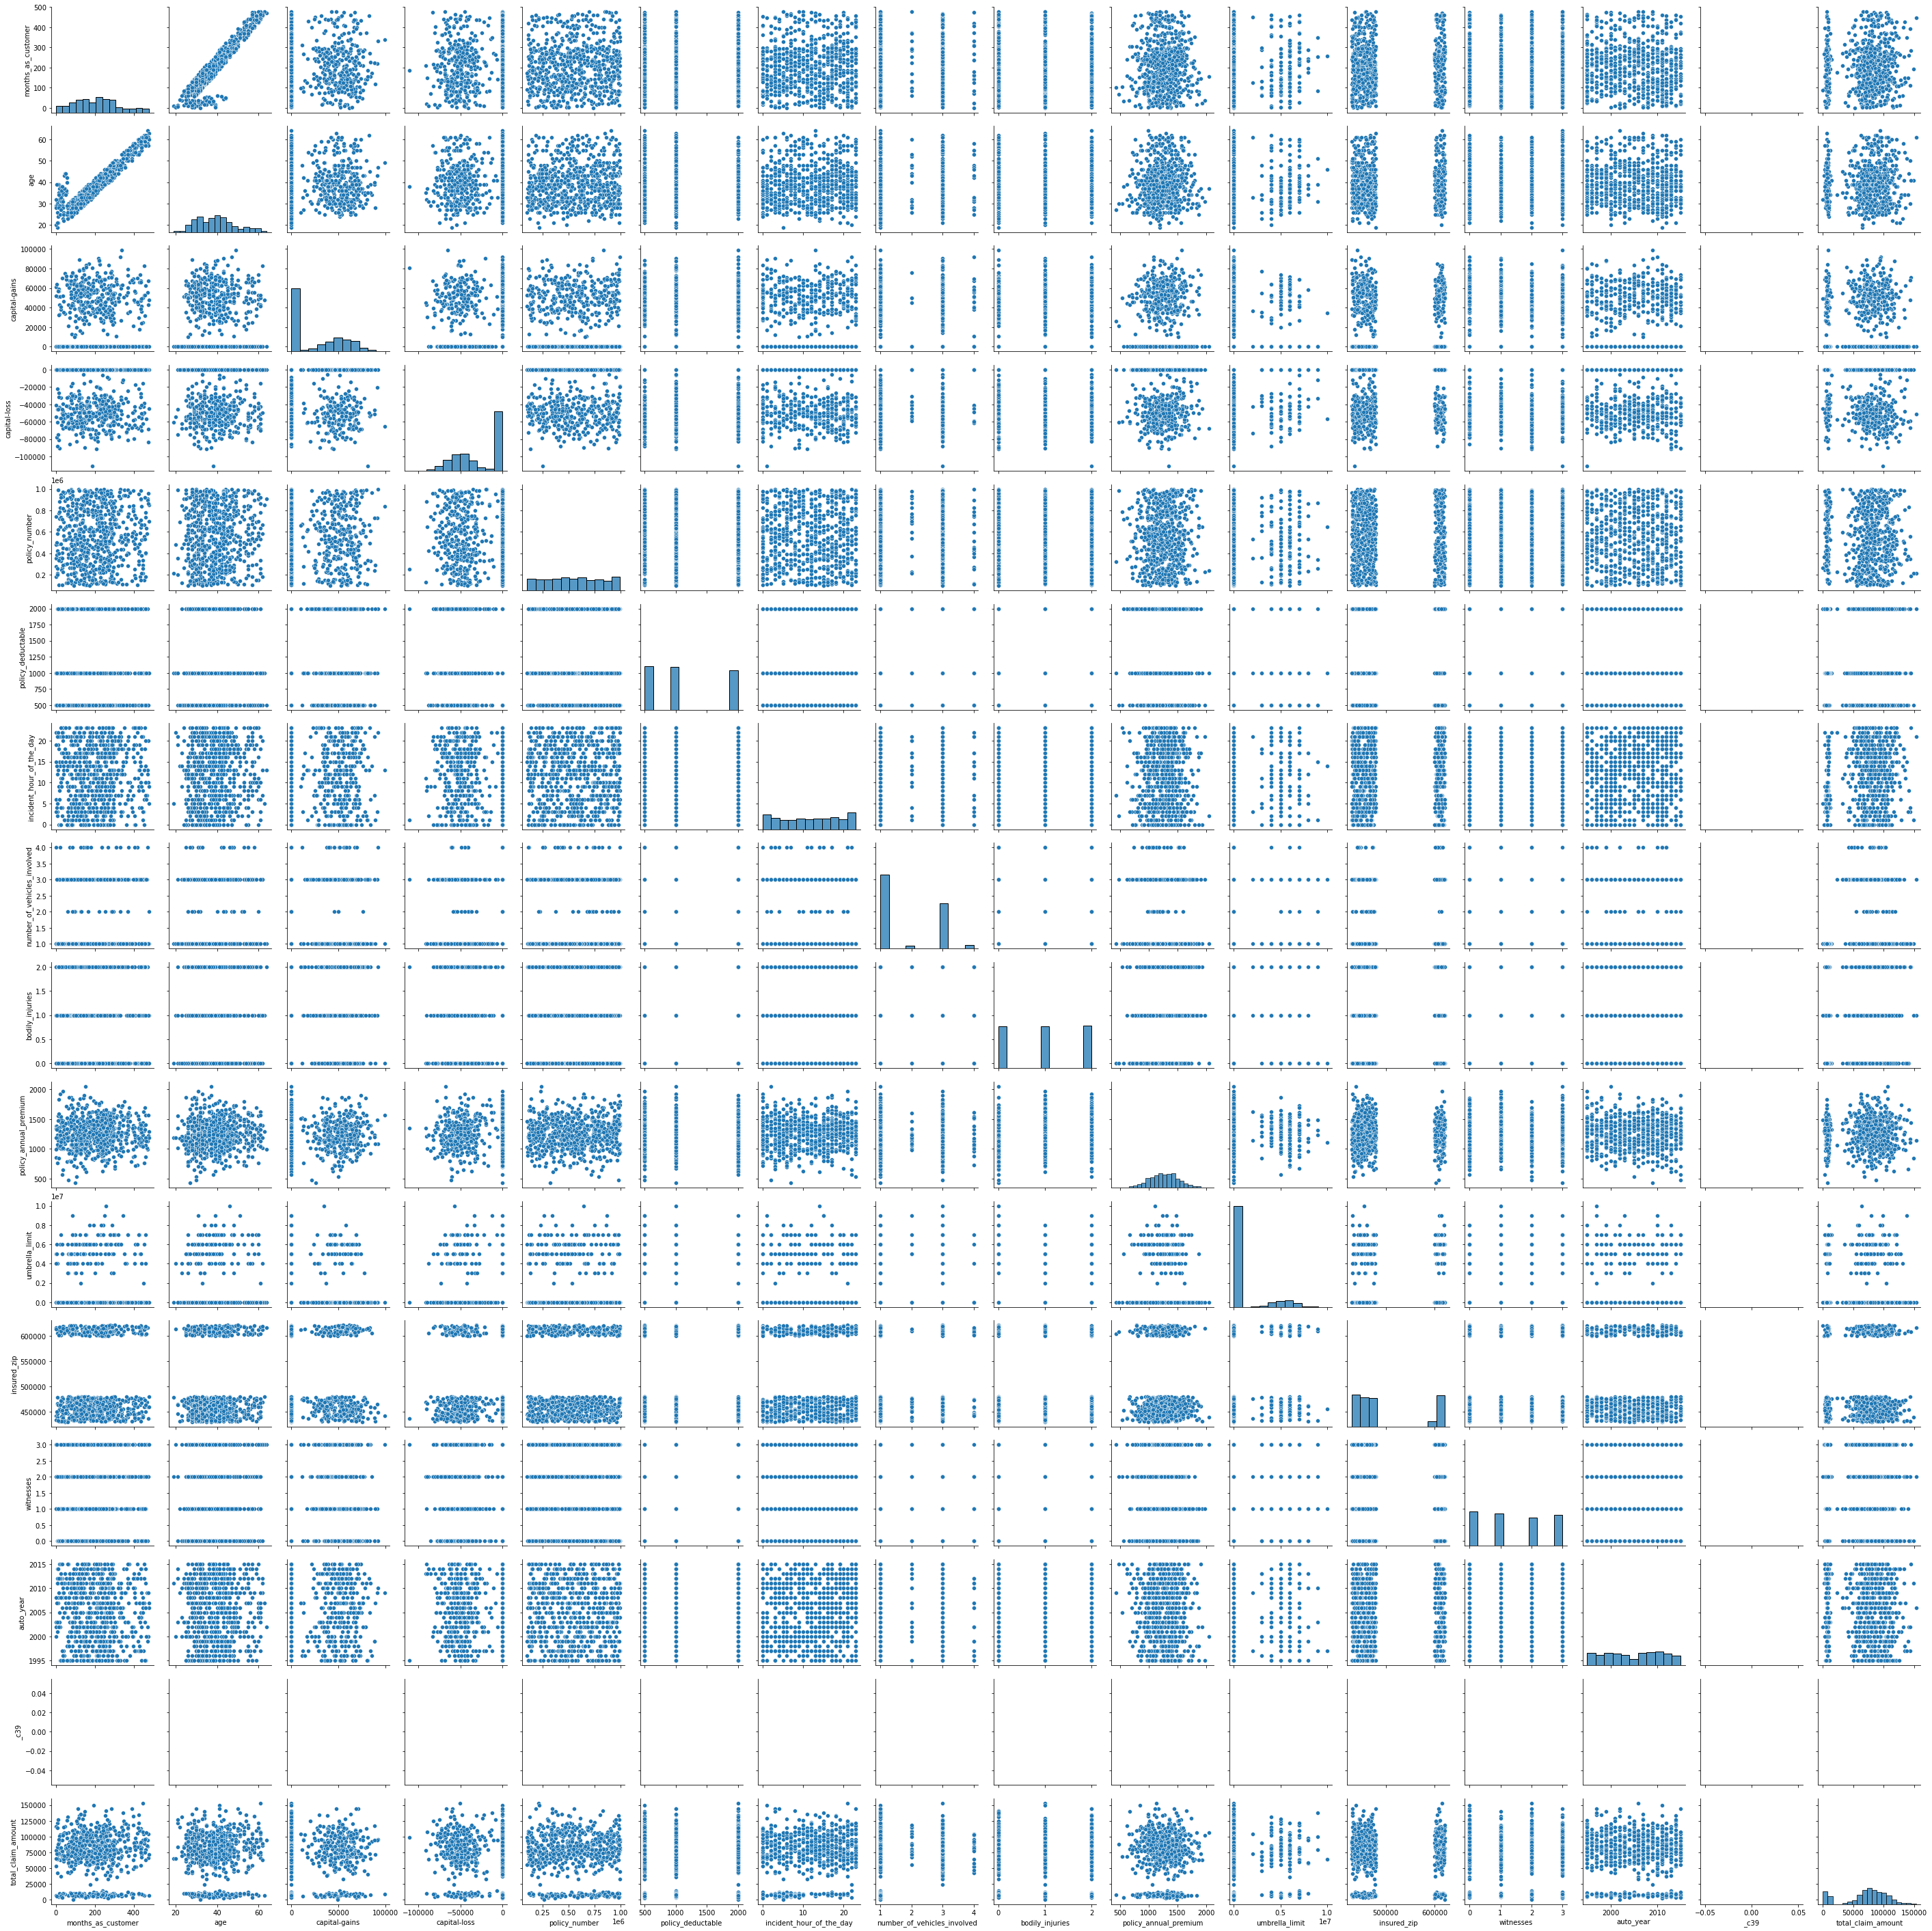

In [37]:
import seaborn as sns
sns.pairplot(train)

<AxesSubplot:>

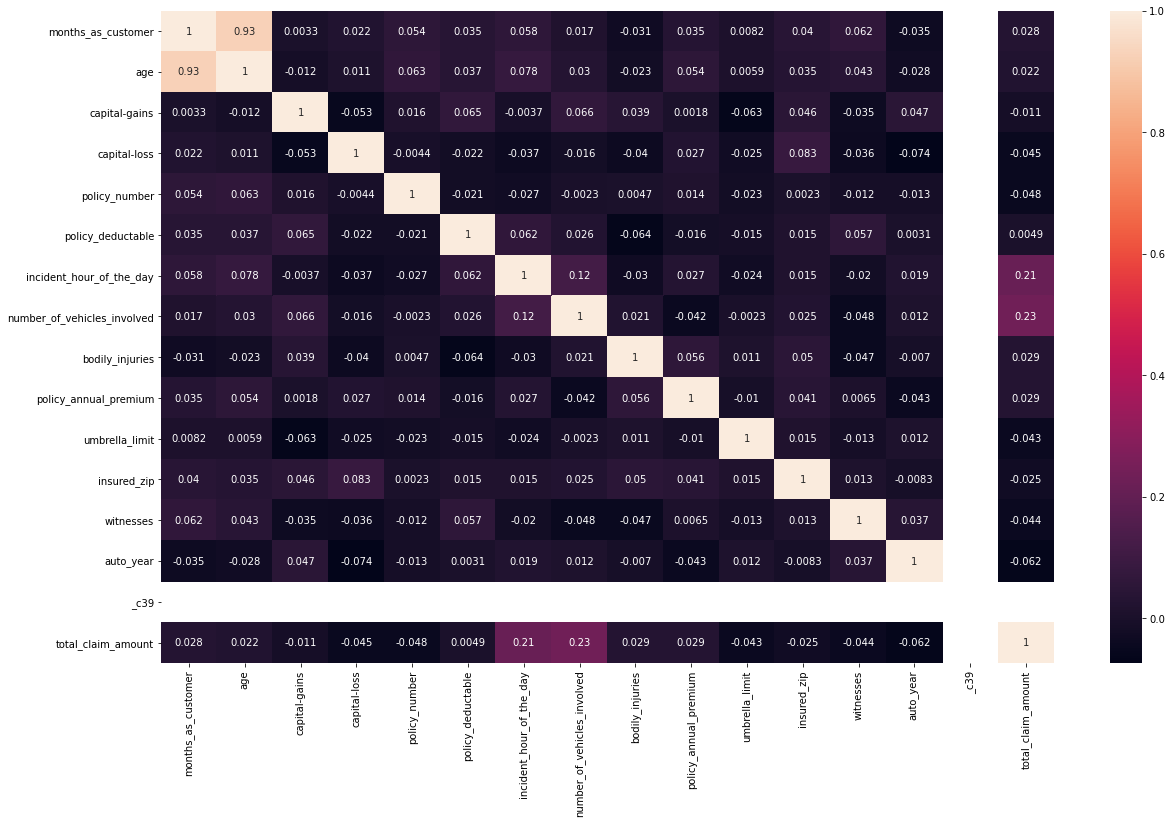

In [38]:
plt.figure(figsize=(20,12))
sns.heatmap(train.corr(),annot=True) #annot shows numeric in the plot

## Checking for Missing values and NaN's

In [19]:
train.isnull().sum()

Customer_ID                      0
months_as_customer               0
age                              0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                  0
bodily_injuries                  0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
incident_date                    0
incident_type                    0
collision_type                   0
incident_severity                0
authorities_contacted            0
incident_state      

##only '_c39' has missing feature(s)

## Checking for cardinality of Feature Observations(ESPECIALLY FOR CATAEGORICAL FEATURES)

In [39]:
train.nunique()

Customer_ID                    700
months_as_customer             346
age                             46
insured_sex                      2
insured_education_level          7
insured_occupation              14
insured_hobbies                 20
insured_relationship             6
capital-gains                  269
capital-loss                   288
policy_number                  700
policy_bind_date               671
policy_state                     3
policy_csl                       3
policy_deductable                3
incident_location              700
incident_hour_of_the_day        24
number_of_vehicles_involved      4
property_damage                  3
bodily_injuries                  3
policy_annual_premium          694
umbrella_limit                  10
insured_zip                    697
incident_date                   60
incident_type                    4
collision_type                   4
incident_severity                4
authorities_contacted            5
incident_state      

In [40]:
# list of categorical variables
categorical_features = [feature for feature in train.columns if train[feature].dtypes =='O']

print('Number of categorical variables: ', len(categorical_features))

# visualise the numerical variables
train[categorical_features].head()

Number of categorical variables:  21


,Customer_ID,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,policy_bind_date,policy_state,policy_csl,incident_location,...,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,police_report_available,auto_make,auto_model
0,Customer_541,FEMALE,JD,farming-fishing,paintball,other-relative,2013-11-11,OH,250/500,6303 1st Drive,...,2015-02-18,Parked Car,?,Trivial Damage,Police,NC,Arlington,YES,Mercedes,E400
1,Customer_440,MALE,Masters,protective-serv,yachting,not-in-family,2005-12-09,IN,500/1000,5585 Washington Drive,...,2015-02-19,Single Vehicle Collision,Rear Collision,Total Loss,Fire,NY,Columbus,NO,Dodge,Neon
2,Customer_482,MALE,JD,handlers-cleaners,golf,not-in-family,2001-11-29,IN,500/1000,1328 Texas Lane,...,2015-01-31,Multi-vehicle Collision,Front Collision,Major Damage,Other,WV,Riverwood,?,Volkswagen,Passat
3,Customer_422,MALE,High School,handlers-cleaners,hiking,husband,2012-10-09,IN,500/1000,6117 4th Ave,...,2015-02-05,Single Vehicle Collision,Front Collision,Major Damage,Other,WV,Columbus,?,Toyota,Corolla
4,Customer_778,MALE,PhD,priv-house-serv,exercise,not-in-family,2004-01-02,IL,100/300,2272 Embaracadero Drive,...,2015-01-03,Multi-vehicle Collision,Front Collision,Total Loss,Police,WV,Springfield,YES,Volkswagen,Jetta


In [41]:
# list of categorical variables
numeric_features = [feature for feature in train.columns if train[feature].dtypes =='int64']

print('Number of numeric variables: ', len(numeric_features))

# visualise the numerical variables
train[numeric_features].head()

Number of numeric variables:  13


,months_as_customer,age,capital-gains,capital-loss,policy_number,policy_deductable,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,umbrella_limit,insured_zip,witnesses,auto_year
0,239,41,51400,-6300,743092,1000,22,1,0,7000000,474898,2,2013
1,108,31,0,0,492224,2000,14,1,0,0,608767,2,2006
2,116,30,0,-35500,996253,500,8,3,0,0,467227,3,2004
3,8,21,0,0,355085,500,21,1,0,0,464237,0,2012
4,161,38,60200,0,192524,2000,0,3,2,0,439870,2,2003


## Some major things to check for:
- Removal of '?'
- Remove 'incident_location' feature as all observations are unique
- Remove '_c39' because all observations are missing
- Working on date format
- Encoding Categorical variable

## Removing '?' using the pandas replace method

In [42]:
new_train = train.replace('?', 'others')
new_test = test.replace('?', 'others')

In [44]:
new_train.head()

,Customer_ID,months_as_customer,age,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,...,authorities_contacted,incident_state,incident_city,witnesses,police_report_available,auto_make,auto_model,auto_year,_c39,total_claim_amount
0,Customer_541,239,41,FEMALE,JD,farming-fishing,paintball,other-relative,51400,-6300,...,Police,NC,Arlington,2,YES,Mercedes,E400,2013,NaN,14386.67
1,Customer_440,108,31,MALE,Masters,protective-serv,yachting,not-in-family,0,0,...,Fire,NY,Columbus,2,NO,Dodge,Neon,2006,NaN,76440.00
2,Customer_482,116,30,MALE,JD,handlers-cleaners,golf,not-in-family,0,-35500,...,Other,WV,Riverwood,3,others,Volkswagen,Passat,2004,NaN,79560.00
3,Customer_422,8,21,MALE,High School,handlers-cleaners,hiking,husband,0,0,...,Other,WV,Columbus,0,others,Toyota,Corolla,2012,NaN,121680.00
4,Customer_778,161,38,MALE,PhD,priv-house-serv,exercise,not-in-family,60200,0,...,Police,WV,Springfield,2,YES,Volkswagen,Jetta,2003,NaN,80640.00


## Removing 'incident_location','_c39' and 'policy_csl'

In [45]:
new_train = new_train.drop(['incident_location','_c39','policy_csl'], axis=1)
new_test = new_test.drop(['incident_location','_c39','policy_csl'], axis=1)

In [46]:
new_train.shape

(700, 34)

In [47]:
new_test.shape

(300, 33)

## Working on date format

In [48]:
from datetime import date

## For Train

In [49]:
# create a 'year, month and day' column for 'policy_bind_date' feature using datetime index
new_train['policy_bind_YEAR'] = pd.DatetimeIndex(new_train['policy_bind_date']).year
new_train['policy_bind_MONTH'] = pd.DatetimeIndex(new_train['policy_bind_date']).month
new_train['policy_bind_DAY'] = pd.DatetimeIndex(new_train['policy_bind_date']).day


In [50]:
# create a 'year, month and day' column for 'incident_date' feature using datetime index
new_train['incident_date_YEAR'] = pd.DatetimeIndex(new_train['incident_date']).year
new_train['incident_date_MONTH'] = pd.DatetimeIndex(new_train['incident_date']).month
new_train['incident_date_DAY'] = pd.DatetimeIndex(new_train['incident_date']).day

## For Test

In [51]:
# create a 'year, month and day' column for 'policy_bind_date' feature using datetime index
new_test['policy_bind_YEAR'] = pd.DatetimeIndex(new_test['policy_bind_date']).year
new_test['policy_bind_MONTH'] = pd.DatetimeIndex(new_test['policy_bind_date']).month
new_test['policy_bind_DAY'] = pd.DatetimeIndex(new_test['policy_bind_date']).day


In [52]:
# create a 'year, month and day' column for 'incident_date' feature
new_test['incident_date_YEAR'] = pd.DatetimeIndex(new_test['incident_date']).year
new_test['incident_date_MONTH'] = pd.DatetimeIndex(new_test['incident_date']).month
new_test['incident_date_DAY'] = pd.DatetimeIndex(new_test['incident_date']).day

## There's need to drop features where extractions have been made in order to avoid data leakage

In [53]:
new_train = new_train.drop(['policy_bind_date','incident_date'], axis=1)
new_test = new_test.drop(['policy_bind_date','incident_date'], axis=1)

In [54]:
new_train.shape

(700, 38)

In [55]:
new_test.shape

(300, 37)

## Encoding Categorical variable

In [56]:
# Applying Label Encoder on the 'insured_sex' column as it contains only 2 unique observations

In [57]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
new_train['insured_sex'] = le.fit_transform(new_train['insured_sex'])
new_test['insured_sex'] = le.fit_transform(new_test['insured_sex'])
new_train.head()

,Customer_ID,months_as_customer,age,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,...,auto_make,auto_model,auto_year,total_claim_amount,policy_bind_YEAR,policy_bind_MONTH,policy_bind_DAY,incident_date_YEAR,incident_date_MONTH,incident_date_DAY
0,Customer_541,239,41,0,JD,farming-fishing,paintball,other-relative,51400,-6300,...,Mercedes,E400,2013,14386.67,2013,11,11,2015,2,18
1,Customer_440,108,31,1,Masters,protective-serv,yachting,not-in-family,0,0,...,Dodge,Neon,2006,76440.00,2005,12,9,2015,2,19
2,Customer_482,116,30,1,JD,handlers-cleaners,golf,not-in-family,0,-35500,...,Volkswagen,Passat,2004,79560.00,2001,11,29,2015,1,31
3,Customer_422,8,21,1,High School,handlers-cleaners,hiking,husband,0,0,...,Toyota,Corolla,2012,121680.00,2012,10,9,2015,2,5
4,Customer_778,161,38,1,PhD,priv-house-serv,exercise,not-in-family,60200,0,...,Volkswagen,Jetta,2003,80640.00,2004,1,2,2015,1,3


In [58]:
new_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer_ID                  700 non-null    object 
 1   months_as_customer           700 non-null    int64  
 2   age                          700 non-null    int64  
 3   insured_sex                  700 non-null    int32  
 4   insured_education_level      700 non-null    object 
 5   insured_occupation           700 non-null    object 
 6   insured_hobbies              700 non-null    object 
 7   insured_relationship         700 non-null    object 
 8   capital-gains                700 non-null    int64  
 9   capital-loss                 700 non-null    int64  
 10  policy_number                700 non-null    int64  
 11  policy_state                 700 non-null    object 
 12  policy_deductable            700 non-null    int64  
 13  incident_hour_of_the

In [59]:
#Checking for object columns(categorical features) to be encoded
new_train.select_dtypes('object').columns

Index(['Customer_ID', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'policy_state',
       'property_damage', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'police_report_available', 'auto_make', 'auto_model'],
      dtype='object')

## Creating One-Hot encoded features

## For Train

In [60]:
ohe1 = pd.get_dummies(new_train['insured_education_level'], prefix='Enc_')
ohe2 = pd.get_dummies(new_train['insured_occupation'], prefix='Enc_')
ohe3 = pd.get_dummies(new_train['insured_hobbies'], prefix='Enc_')
ohe4 = pd.get_dummies(new_train['insured_relationship'], prefix='Enc_')
ohe5 = pd.get_dummies(new_train['policy_state'], prefix='Enc_')
ohe6 = pd.get_dummies(new_train['property_damage'], prefix='Enc_')
ohe7 = pd.get_dummies(new_train['incident_type'], prefix='Enc_')
ohe8 = pd.get_dummies(new_train['collision_type'], prefix='Enc_')
ohe9 = pd.get_dummies(new_train['incident_severity'], prefix='Enc_')
ohe10 = pd.get_dummies(new_train['authorities_contacted'], prefix='Enc_')
ohe11= pd.get_dummies(new_train['incident_state'], prefix='Enc_')
ohe12 = pd.get_dummies(new_train['incident_city'], prefix='Enc_')
ohe13 = pd.get_dummies(new_train['police_report_available'], prefix='Enc_')
ohe14 = pd.get_dummies(new_train['auto_make'], prefix='Enc_')
ohe15 = pd.get_dummies(new_train['auto_model'], prefix='Enc_')



## For Test

In [61]:
he1 = pd.get_dummies(new_test['insured_education_level'], prefix='Enc_')
he2 = pd.get_dummies(new_test['insured_occupation'], prefix='Enc_')
he3 = pd.get_dummies(new_test['insured_hobbies'], prefix='Enc_')
he4 = pd.get_dummies(new_test['insured_relationship'], prefix='Enc_')
he5 = pd.get_dummies(new_test['policy_state'], prefix='Enc_')
he6 = pd.get_dummies(new_test['property_damage'], prefix='Enc_')
he7 = pd.get_dummies(new_test['incident_type'], prefix='Enc_')
he8 = pd.get_dummies(new_test['collision_type'], prefix='Enc_')
he9 = pd.get_dummies(new_test['incident_severity'], prefix='Enc_')
he10 = pd.get_dummies(new_test['authorities_contacted'], prefix='Enc_')
he11= pd.get_dummies(new_test['incident_state'], prefix='Enc_')
he12 = pd.get_dummies(new_test['incident_city'], prefix='Enc_')
he13 = pd.get_dummies(new_test['police_report_available'], prefix='Enc_')
he14 = pd.get_dummies(new_test['auto_make'], prefix='Enc_')
he15 = pd.get_dummies(new_test['auto_model'], prefix='Enc_')

In [62]:
new_train = new_train.drop(['Customer_ID','insured_education_level','insured_occupation','insured_hobbies','insured_relationship','policy_state','property_damage','incident_type','collision_type','incident_severity','authorities_contacted','incident_state','incident_city','police_report_available','auto_make','auto_model'], axis=1)

In [63]:
new_test = new_test.drop(['Customer_ID','insured_education_level','insured_occupation','insured_hobbies','insured_relationship','policy_state','property_damage','incident_type','collision_type','incident_severity','authorities_contacted','incident_state','incident_city','police_report_available','auto_make','auto_model'], axis=1)

In [64]:
# Concatenate OHE features to 'data_df'
new_train = pd.concat([new_train, ohe1,ohe2,ohe3,ohe4,ohe5,ohe6,ohe7,ohe8,ohe9,ohe10,ohe11,ohe12,ohe13,ohe14,ohe15,], axis=1)
new_test = pd.concat([new_test, he1,he2,he3,he4,he5,he6,he7,he8,he9,he10,he11,he12,he13,he14,he15,], axis=1)

pause

In [65]:
new_train.shape

(700, 162)

In [66]:
new_train.head(10)

,months_as_customer,age,insured_sex,capital-gains,capital-loss,policy_number,policy_deductable,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,...,Enc__Pathfinder,Enc__RAM,Enc__RSX,Enc__Silverado,Enc__TL,Enc__Tahoe,Enc__Ultima,Enc__Wrangler,Enc__X5,Enc__X6
0,239,41,0,51400,-6300,743092,1000,22,1,0,...,0,0,0,0,0,0,0,0,0,0
1,108,31,1,0,0,492224,2000,14,1,0,...,0,0,0,0,0,0,0,0,0,0
2,116,30,1,0,-35500,996253,500,8,3,0,...,0,0,0,0,0,0,0,0,0,0
3,8,21,1,0,0,355085,500,21,1,0,...,0,0,0,0,0,0,0,0,0,0
4,161,38,1,60200,0,192524,2000,0,3,2,...,0,0,0,0,0,0,0,0,0,0
5,407,55,0,0,-57700,193213,1000,0,3,2,...,0,0,0,0,0,0,0,0,0,0
6,96,30,1,38900,-48700,406567,500,22,1,0,...,0,0,0,0,0,0,0,0,0,0
7,282,46,1,51100,-75100,502634,2000,2,1,2,...,0,0,0,0,0,0,0,0,0,0
8,146,31,0,0,0,149839,1000,0,3,1,...,0,0,0,0,0,0,0,0,0,0
9,371,54,1,34700,-81000,403776,2000,18,3,1,...,0,0,0,0,0,0,0,0,0,0


## Seperating the Features from the Target variable

In [67]:
X = new_train.drop('total_claim_amount',axis=1)
y = new_train['total_claim_amount']

## Training the data

In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
def cross_val(modelName):
    pred = cross_val_score(modelName, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square


In [70]:
#Instantiate model 
modelName = DecisionTreeRegressor(splitter='random',random_state=15 )
modelName.fit(X_train,y_train)
testPred = modelName.predict(X_test)
trainPred = modelName.predict(X_train)
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, testPred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, trainPred)

Test set evaluation:
_____________________________________
MAE: 22200.476214285714
MSE: 939276504.104138
RMSE: 30647.61824521015
R2 Square 0.27131966591122336
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.0
MSE: 0.0
RMSE: 0.0
R2 Square 1.0
__________________________________


In [71]:
results = pd.DataFrame(data=[["DecisionTreeRegressor", *evaluate(y_test, testPred) , cross_val(DecisionTreeRegressor())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results


,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,DecisionTreeRegressor,22200.476214,9.392765e+08,30647.618245,0.27132,0.297581


In [72]:
modelName = LinearRegression()
modelName.fit(X_train,y_train)
testPred = modelName.predict(X_test)
trainPred = modelName.predict(X_train)
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, testPred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, trainPred)

Test set evaluation:
_____________________________________
MAE: 18360.106743206503
MSE: 588653225.1211509
RMSE: 24262.17684217867
R2 Square 0.5433293318107324
__________________________________
Train set evaluation:
_____________________________________
MAE: 12825.34647098891
MSE: 270761105.80713314
RMSE: 16454.82013900891
R2 Square 0.77426374022988
__________________________________


In [73]:
results1 = pd.DataFrame(data=[["LinearRegression", *evaluate(y_test, testPred) , cross_val(LinearRegression())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results = results.append(results1, ignore_index=True)
results

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,DecisionTreeRegressor,22200.476214,9.392765e+08,30647.618245,0.271320,0.297581
1,LinearRegression,18360.106743,5.886532e+08,24262.176842,0.543329,0.600153


In [74]:
modelName = KNeighborsRegressor()
modelName.fit(X_train,y_train)
testPred = modelName.predict(X_test)
trainPred = modelName.predict(X_train)
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, testPred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, trainPred)

Test set evaluation:
_____________________________________
MAE: 30836.93308571428
MSE: 1480847202.295067
RMSE: 38481.77753554359
R2 Square -0.14882489808684007
__________________________________
Train set evaluation:
_____________________________________
MAE: 24650.352399999996
MSE: 992116523.2384168
RMSE: 31497.88124998913
R2 Square 0.1728624665482681
__________________________________


In [75]:
results2 = pd.DataFrame(data=[["KNeighborsRegressor", *evaluate(y_test, testPred) , cross_val(KNeighborsRegressor())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results = results.append(results2, ignore_index=True)
results

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,DecisionTreeRegressor,22200.476214,9.392765e+08,30647.618245,0.271320,0.297581
1,LinearRegression,18360.106743,5.886532e+08,24262.176842,0.543329,0.600153
2,KNeighborsRegressor,30836.933086,1.480847e+09,38481.777536,-0.148825,-0.241532


In [76]:
modelName = RandomForestRegressor(max_depth=2, random_state=0)
modelName.fit(X_train,y_train)
testPred = modelName.predict(X_test)
trainPred = modelName.predict(X_train)
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, testPred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, trainPred)

Test set evaluation:
_____________________________________
MAE: 15380.678161420108
MSE: 427725368.7759431
RMSE: 20681.522399860776
R2 Square 0.6681753847178702
__________________________________
Train set evaluation:
_____________________________________
MAE: 14160.581288097992
MSE: 357080364.07685274
RMSE: 18896.570167013186
R2 Square 0.702298505600438
__________________________________


In [77]:
results3 = pd.DataFrame(data=[["RandomForestRegressor", *evaluate(y_test, testPred) , cross_val(RandomForestRegressor())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results = results.append(results3, ignore_index=True)
results

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,DecisionTreeRegressor,22200.476214,9.392765e+08,30647.618245,0.271320,0.297581
1,LinearRegression,18360.106743,5.886532e+08,24262.176842,0.543329,0.600153
2,KNeighborsRegressor,30836.933086,1.480847e+09,38481.777536,-0.148825,-0.241532
3,RandomForestRegressor,15380.678161,4.277254e+08,20681.522400,0.668175,0.660592


In [78]:
from sklearn.svm import SVR
modelName = SVR()
modelName.fit(X_train,y_train)
testPred = modelName.predict(X_test)
trainPred = modelName.predict(X_train)
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, testPred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, trainPred)

Test set evaluation:
_____________________________________
MAE: 27791.629611471948
MSE: 1321025539.5675642
RMSE: 36345.91503274562
R2 Square -0.024837017966303332
__________________________________
Train set evaluation:
_____________________________________
MAE: 26155.52075744488
MSE: 1234998459.0085638
RMSE: 35142.54485674826
R2 Square -0.029630648491429268
__________________________________


In [79]:
results4 = pd.DataFrame(data=[["SVM Regression", *evaluate(y_test, testPred) , cross_val(SVR())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results = results.append(results4, ignore_index=True)
results

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,DecisionTreeRegressor,22200.476214,9.392765e+08,30647.618245,0.271320,0.297581
1,LinearRegression,18360.106743,5.886532e+08,24262.176842,0.543329,0.600153
2,KNeighborsRegressor,30836.933086,1.480847e+09,38481.777536,-0.148825,-0.241532
3,RandomForestRegressor,15380.678161,4.277254e+08,20681.522400,0.668175,0.660592
4,SVM Regression,27791.629611,1.321026e+09,36345.915033,-0.024837,-0.041118


##### RANDOM FOREST REGRESSOR GAVE THE LOWEST RMSE ,SO I WILL BE DOING HYPERPARAMETER TUNNING

In [80]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

In [81]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [82]:
# Use the random grid to search for best hyperparameters
from sklearn.model_selection import RandomizedSearchCV
# First create the base model to tune
rf = RandomForestRegressor()
# Create the random grid

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [83]:
new_test['total_claim_amount'] = rf_random.predict(new_test)

In [84]:
new_test['total_claim_amount'].shape

(300,)

In [85]:
y.shape

(700,)

In [86]:
#from sklearn.metrics import mean_squared_error
#from math import sqrt

#rms = sqrt(mean_squared_error(y,new_test['total_claim_amount']))

In [87]:
new_test['Customer_ID'] = test['Customer_ID']

In [88]:
# # Write test predictions using the sample_submission format
new_test[['Customer_ID','total_claim_amount']].to_csv('Kaggle_DSN_SUBMISSION_FINAL.csv', index=False)

In [ ]:
pd.read_csv('sample_submission.csv')